# Oversampling 
Oversampling data tak seimbang menggunakan SMOTE
## Visualisasi PCA dan LDA (2D)
Sebelum melakukan klasifikasi, kita bisa memvisualisasikan distribusi data untuk memahami strukturnya. Dataset IRIS memiliki 4 fitur utama:
* Sepal Length
* Sepal Width
* Petal Length
* Petal Width

Karena tidak bisa langsung divisualisasikan dalam 4 dimensi, maka digunakan teknik reduksi dimensi:

Explained variance ratio (first two components): [0.928697   0.04911462]


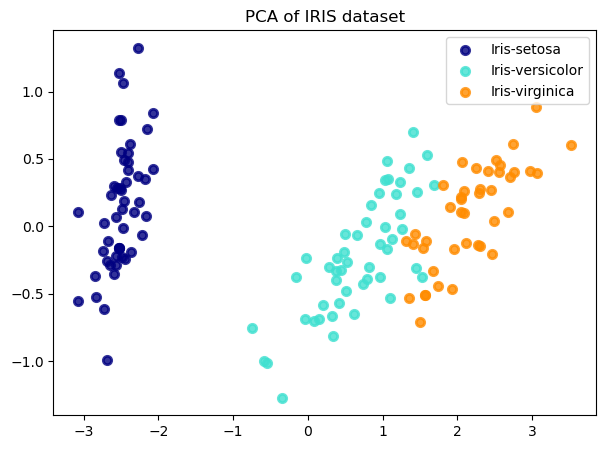

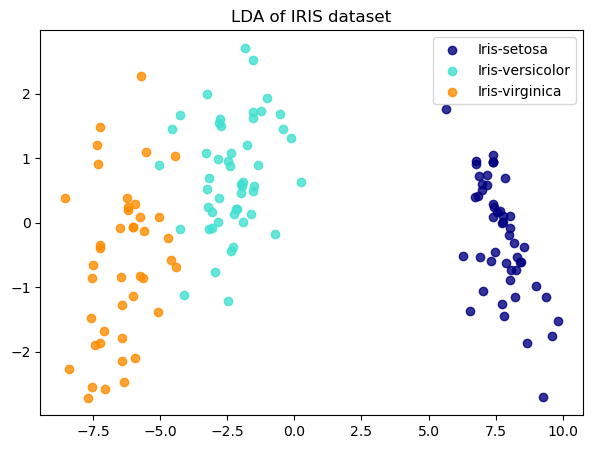

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import LabelEncoder

# Baca dataset
df = pd.read_csv("iris_cluster_abod_clean.csv")

# Ambil fitur & target
X = df[["sepal length","sepal width","petal length","petal width"]].values
y = LabelEncoder().fit_transform(df["Class"])  # ubah label string jadi angka
target_names = df["Class"].unique()

# PCA (2D)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# LDA (2D)
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Variance explained PCA
print("Explained variance ratio (first two components):", pca.explained_variance_ratio_)

# Plot PCA
plt.figure(figsize=(7,5))
colors = ["navy", "turquoise", "darkorange"]
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], alpha=0.8, lw=2, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

# Plot LDA
plt.figure(figsize=(7,5))
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()


Hasilnya:

*    PCA plot → data direduksi jadi 2 dimensi dengan tetap mempertahankan variasi terbesar.
*    LDA plot → data direduksi jadi 2 dimensi dengan memaksimalkan pemisahan antar kelas (Class).
## Klasifikasi
1. Klasifikasi Jenis Bunga (Supervised Learning - Berdasarkan Class)

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Baca dataset
df = pd.read_csv("iris_cluster_abod_clean.csv")

# Fitur & target
X = df[["sepal length","sepal width","petal length","petal width"]]
y = df["Class"]

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluasi
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10  0  0]
 [ 0  9  1]
 [ 0  1  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.93        29
      macro avg       0.93      0.93      0.93        29
   weighted avg       0.93      0.93      0.93        29



Hasilnya: akurasi sangat baik 93%, karena IRIS dataset relatif mudah dipisahkan.

Analisis Singkat:

*    Iris-setosa diklasifikasikan dengan sempurna (precision, recall, dan F1-score = 1.00).
*    Iris-versicolor dan Iris-virginica memiliki sedikit kesalahan klasifikasi:
*    Masing-masing salah satu instance diklasifikasikan sebagai kelas yang salah.
*    Semua metrik makro dan weighted average juga berada di angka 0.93, menandakan performa yang cukup konsisten.
2. Klasifikasi Inlier vs Outlier (Berdasarkan Kolom Anomaly)

In [4]:
# Target anomaly
X = df[["sepal length","sepal width","petal length","petal width"]]
y = df["Anomaly"]

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standarisasi
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model
clf.fit(X_train, y_train)

# Evaluasi
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[25  3]
 [ 1  0]]
              precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.00      0.00      0.00         1

    accuracy                           0.86        29
   macro avg       0.48      0.45      0.46        29
weighted avg       0.93      0.86      0.89        29



Hasil klasifikasi Anomaly (0 = inlier, 1 = outlier), karena:
*    25 data inlier diprediksi benar sebagai inlier
*    3 data inlier salah diprediksi sebagai outlier (false positive)
*    1 data outlier salah diprediksi sebagai inlier (false negative)
*    0 data outlier diprediksi benar sebagai outlier

Classification report nunjukkin masalah:

*    Kelas 0 (inlier) performanya bagus (precision 0.96, recall 0.89, f1-score 0.93).
*    Kelas 1 (outlier) gagal total (precision 0.00, recall 0.00, f1-score 0.00).
*    Akurasi lumayan tinggi (0.86), tapi menipu, karena model hampir selalu nebak 0.

**Kenapa begitu?**
Karena dataset sangat imbalanced → jumlah Anomaly = 1 jauh lebih sedikit daripada 0. Model jadi bias ke mayoritas (inlier).

**Cara Mengatasinya**

Cara mengatasinya adalah resampling dengan beberapa pendekatan:
1.    Oversampling outlier (misal pakai SMOTE)
2.    Undersampling inlier
## Oversampling(SMOTE)
update scikit-learn agar sesuai dengan versi imblearn

In [5]:
!pip install -U scikit-learn imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement imbalanced-learn (from versions: none)
ERROR: No matching distribution found for imbalanced-learn


Cek distribusi kelas sebelum SMOTE

In [6]:
from collections import Counter
print(Counter(y_train))


Counter({0: 110, 1: 3})


Dari output diatas berarti: 
*    Kelas mayoritas (0) punya 110 sampel.
*    Kelas minoritas (1) hanya 3 sampel.

**Masalah Utama:**

SMOTE default butuh minimal k_neighbors + 1 sampel dalam kelas minoritas untuk bekerja. Jadi:

*    Default k_neighbors=5 tidak bisa, karena kamu cuma punya 3 sampel.
*    Bahkan k_neighbors=2 pun masih terlalu tinggi.

Karena hanya punya 3 sampel, cuma bisa pakai k_neighbors=1:

In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = smote.fit_resample(X_train, y_train)


Cek Dulu: Data Seimbang atau Tidak?

Sebelum pakai SMOTE, cek distribusi label:

In [ ]:
import pandas as pd

# Misal y adalah target
print(y.value_counts())


Anomaly
0    138
1      4
Name: count, dtype: int64


Hasil ini memiliki:
*    138 data normal (label 0)
*    4 data anomali (label 1)

Karena Ini adalah kasus anomaly detection, bukan klasifikasi biasa. Anomali (outlier) hanya ~2.8% dari total data, dan ini sangat tidak seimbang. Maka yang bisa dilakukan adalah dengan klasifikasi anomaly (supervised):

melatih model untuk membedakan normal vs anomali berdasarkan label (0 vs 1). Karena jumlah anomali sangat kecil

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# 1. Load data
df = pd.read_csv("iris_cluster_abod_clean.csv")

# 2. Pilih fitur & target
X = df[["sepal length","sepal width","petal length","petal width"]]
y = df["Anomaly"]

# 3. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Standarisasi
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Resampling pakai SMOTE
smote = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = smote.fit_resample(X_train, y_train)

print("Sebelum SMOTE:", y_train.value_counts().to_dict())
print("Sesudah SMOTE:", pd.Series(y_res).value_counts().to_dict())

# 6. Model Logistic Regression dengan class_weight balanced
clf = LogisticRegression(class_weight="balanced", random_state=42)
clf.fit(X_res, y_res)

# 7. Evaluasi
y_pred = clf.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Sebelum SMOTE: {0: 110, 1: 3}
Sesudah SMOTE: {0: 110, 1: 110}

Confusion Matrix:
 [[26  2]
 [ 1  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95        28
           1       0.00      0.00      0.00         1

    accuracy                           0.90        29
   macro avg       0.48      0.46      0.47        29
weighted avg       0.93      0.90      0.91        29

